<a href="https://colab.research.google.com/github/mrcrchln/Sentiment-Analysis/blob/main/NLP_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build web scraper and apply Machine Learning and Natural Language Processing techniques for sentiment analysis of google news

This script allows you to gather news articles related to a given search term (in this case a company name), assess the sentiment of the titles, and calculate an average sentiment score to gauge the overall sentiment in the news. This can be useful for tracking public perception and sentiment about the company over time as well as identify negative outliers as part of a short due dilligence process.

In [1]:
pip install feedparser

In [2]:
import feedparser
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import urllib.parse
from bs4 import BeautifulSoup
import pandas as pd

# Define the company name for analysis
company_name = "Aptiv"

# Encode the company name for the URL
encoded_company_name = urllib.parse.quote(company_name)

# Initialize the VADER sentiment analyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Initialize lists to store sentiment scores
titles = []
title_sentiments = []
dates = []
urls = []

# Fetch news articles from Google News RSS feed without page iteration
rss_url = f"https://news.google.com/rss/search?q={encoded_company_name}&hl=en-US&gl=US&ceid=US:en"
feed = feedparser.parse(rss_url)

# Analyze sentiment for each news article in the feed
for entry in feed.entries:
    title = entry.title.strip()
    description = entry.description
    date = entry.published

    # Remove the anchor tag from the description and extract the URL
    soup = BeautifulSoup(description, 'html.parser')
    anchors = soup.find_all('a')
    for anchor in anchors:
        anchor.extract()
    description = soup.get_text().strip()
    url = anchor.get('href')

    # Check if the title is not already in the list before adding it
    if title not in titles:
        titles.append(title)
        title_sentiment = sia.polarity_scores(title)
        title_sentiments.append(title_sentiment['compound'])
        dates.append(date)
        urls.append(url)

# Create a Pandas DataFrame to store the data
df = pd.DataFrame({
    'Title': titles,
    'Sentiment': title_sentiments,
    'Date': dates,
    'URL': urls
})

# Calculate average sentiment scores
avg_title_sentiment = sum(title_sentiments) / len(title_sentiments)

# Print average sentiment scores, the number of titles, and the average date
print(f"Average Title Sentiment: {avg_title_sentiment}")
print(f"Number of Titles: {len(df)}")

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average Title Sentiment: 0.11558080808080809
Number of Titles: 99


In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
# Print Top 5 Positive
df.sort_values(by='Sentiment', ascending=False).head(5)

,Title,Sentiment,Date,URL
5,Aptiv PLC Demonstrates Strong Financial Perfor...,0.8779,2023-09-04 22:55:54+00:00,https://news.google.com/rss/articles/CBMiSmh0d...
67,"Denso rated most valuable component brand, Apt...",0.7425,2023-04-05 07:00:00+00:00,https://news.google.com/rss/articles/CBMigwFod...
31,Auto Parts and Accessories Market Comprehensiv...,0.7096,2023-09-04 12:01:00+00:00,https://news.google.com/rss/articles/CBMiYmh0d...
42,"Horizon Robotics, Aptiv join forces to develop...",0.6369,2023-07-03 07:00:00+00:00,https://news.google.com/rss/articles/CBMiK2h0d...
50,Aptiv PLC's (NYSE:APTV) Has Performed Well But...,0.6059,2023-04-12 07:00:00+00:00,https://news.google.com/rss/articles/CBMiTGh0d...


# Negative Only

In [4]:
# Filter rows with negative sentiment
neg_df = df[df['Sentiment'] < 0]

# Export the most negative DataFrame to an Excel file
neg_df.to_csv('neg_news.csv', index=False)

# Print the Top 5 Negative
print("Top 5 Negative News:")
neg_df.sort_values(by='Sentiment', ascending=True).head(5)

Top 5 Negative News:


,Title,Sentiment,Date,URL
78,"3 Stocks That Could Possibly Turn $10,000 Into...",-0.4404,2023-06-18 07:00:00+00:00,https://news.google.com/rss/articles/CBMiXWh0d...
48,Is it Time to Dump Aptiv PLC (APTV) Stock Afte...,-0.3818,2023-07-27 07:00:00+00:00,https://news.google.com/rss/articles/CBMigAFod...
86,"Stock in Aptiv, a Key Car-Parts Supplier, Plun...",-0.2732,2022-08-04 07:00:00+00:00,https://news.google.com/rss/articles/CBMiSmh0d...
92,Aptiv Beats Earnings. Chip Shortage Continues ...,-0.2500,2021-11-04 07:00:00+00:00,https://news.google.com/rss/articles/CBMiRmh0d...
26,Live Nation reports largest 2022 CEO-to-median...,-0.1027,2023-08-24 19:34:55+00:00,https://news.google.com/rss/articles/CBMiqwFod...


# Positive Only

In [5]:
# Filter rows with negative sentiment
pos_df = df[df['Sentiment'] > 0]

# Export the most negative DataFrame to an Excel file
pos_df.to_csv('pos_news.csv', index=False)

# Print the Top 5 Negative
print("Top 5 Negative News:")
pos_df.sort_values(by='Sentiment', ascending=False).head(5)

Top 5 Negative News:


,Title,Sentiment,Date,URL
5,Aptiv PLC Demonstrates Strong Financial Perfor...,0.8779,2023-09-04 22:55:54+00:00,https://news.google.com/rss/articles/CBMiSmh0d...
67,"Denso rated most valuable component brand, Apt...",0.7425,2023-04-05 07:00:00+00:00,https://news.google.com/rss/articles/CBMigwFod...
31,Auto Parts and Accessories Market Comprehensiv...,0.7096,2023-09-04 12:01:00+00:00,https://news.google.com/rss/articles/CBMiYmh0d...
42,"Horizon Robotics, Aptiv join forces to develop...",0.6369,2023-07-03 07:00:00+00:00,https://news.google.com/rss/articles/CBMiK2h0d...
50,Aptiv PLC's (NYSE:APTV) Has Performed Well But...,0.6059,2023-04-12 07:00:00+00:00,https://news.google.com/rss/articles/CBMiTGh0d...


# Visualisation

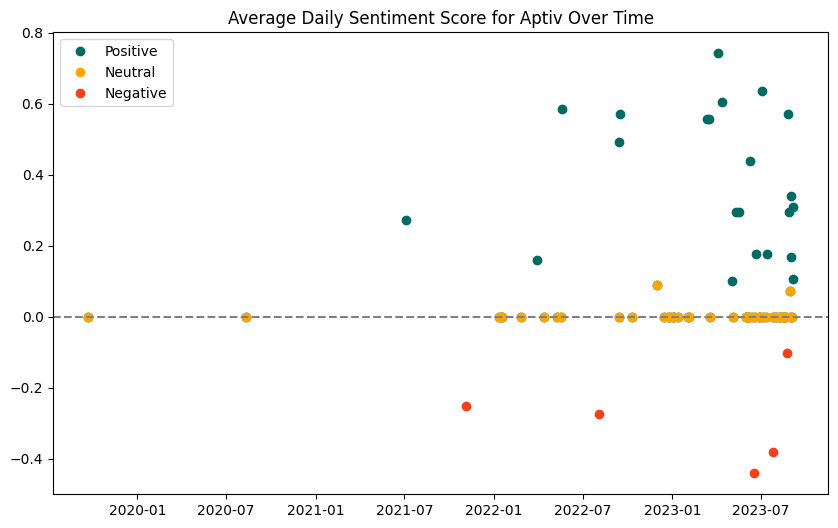

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pandas DataFrame with sentiment scores and dates
plot = pd.DataFrame({'Date': dates, 'Sentiment': title_sentiments})
plot['Date'] = pd.to_datetime(plot['Date'])

# Calculate average sentiment scores per day
avg_sentiment_per_day = plot.resample('D', on='Date')['Sentiment'].mean()

# Plot the average sentiment over time with different colors for positive, neutral, and negative data points
plt.figure(figsize=(10, 6))
plt.plot(avg_sentiment_per_day[avg_sentiment_per_day >= 0].index, avg_sentiment_per_day[avg_sentiment_per_day >= 0].values, marker='o', linestyle='', color='#006B63', label='Positive')
plt.plot(avg_sentiment_per_day[(avg_sentiment_per_day >= -0.1) & (avg_sentiment_per_day < 0.1)].index, avg_sentiment_per_day[(avg_sentiment_per_day >= -0.1) & (avg_sentiment_per_day < 0.1)].values, marker='o', linestyle='', color='orange', label='Neutral')
plt.plot(avg_sentiment_per_day[avg_sentiment_per_day < -0.1].index, avg_sentiment_per_day[avg_sentiment_per_day < -0.1].values, marker='o', linestyle='', color='#F74018', label='Negative')
plt.axhline(0, color='gray', linestyle='--')
plt.title(f'Average Daily Sentiment Score for {company_name} Over Time')
plt.legend()
plt.show()